# РК2 (Кулешова Ирина, ИУ5-65Б)

## 10 вариант

**Задание.** Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

**Задание по варианту:** метод опорных векторов, градиентный бустинг.

**Датасет:** https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent (файл houses_to_rent_v2.csv)

В качестве набора данных предлагается датасет с бразильскими домами для аренды.

В данном датасете 13 колонок:

* **city** - город, в котором расположен дом;
* **area** - площадь объекта недвижимости; 
* **rooms** - количество комнат в доме;
* **bathroom** - количество ванных комнат в доме;
* **parking spaces** - количество парковочных мест в доме;
* **floor** - сколько этажей в доме;
* **animal** - можно ли въезжать в дом с животными;
* **furniture** - обставлен ли дом или нет;
* **hoa (R)** - налог ассоциации домовладельцев;
* **rent amount (R)** - сумма арендной платы;
* **property tax (R)** - налог на имущество;
* **fire insurance (R)** - страховка при пожаре.

In [68]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных и первичный анализ

In [41]:
# Загрузка данных из CSV файла
rent = pd.read_csv('data/houses_to_rent_v2.csv')

# Список имен столбцов, которые вы хотите использовать в качестве признаков
selected_features = ['rooms', 'area']

target = rent['total (R$)']

# Создание DataFrame с выбранными признаками
features = rent.loc[:, selected_features]

#### Основные характеристики датасета

In [42]:
# Первые 5 строк датасета
rent.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [43]:
# Размер датасета
rent.shape

(200, 13)

In [44]:
# Список колонок с типами данных
rent.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [45]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in rent.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = rent[rent[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

city - 0
area - 0
rooms - 0
bathroom - 0
parking spaces - 0
floor - 0
animal - 0
furniture - 0
hoa (R$) - 0
rent amount (R$) - 0
property tax (R$) - 0
fire insurance (R$) - 0
total (R$) - 0


Пропущенных значений нет, поэтому заполнять пропуски не нужно.

## Метод опорных векторов

In [46]:
df_houses_to_rent = pd.DataFrame(features.values,columns=features.columns.tolist())
df_houses_to_rent['target'] = pd.Series(target.values)
rent_x = df_houses_to_rent['area'].values
rent_y = df_houses_to_rent['target'].values

<Axes: >

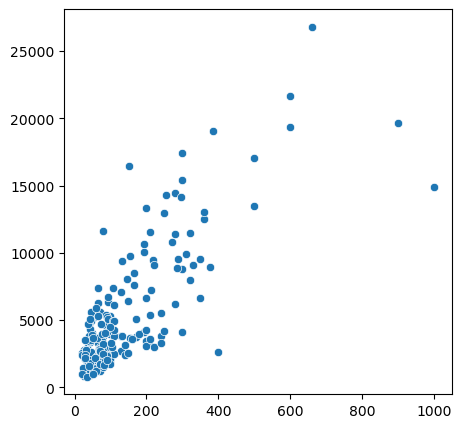

In [47]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=rent_x, y=rent_y)

In [48]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(rent_x.reshape(-1, 1), rent_y)
    rent_y_pred = clf.predict(rent_x.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(rent_x, rent_y, 'b.')
    ax.plot(rent_x, rent_y_pred, 'ro')
    plt.show()

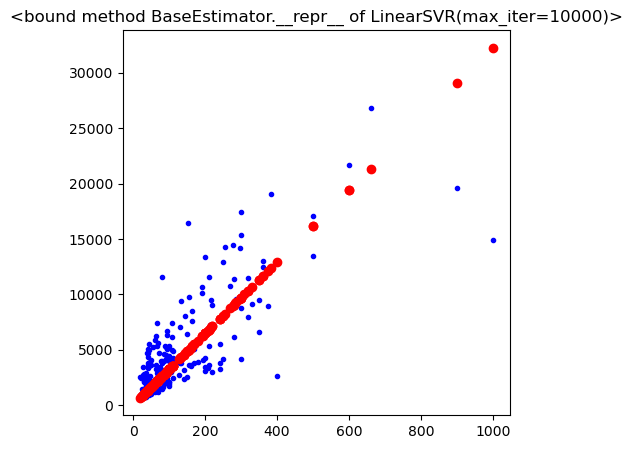

In [49]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


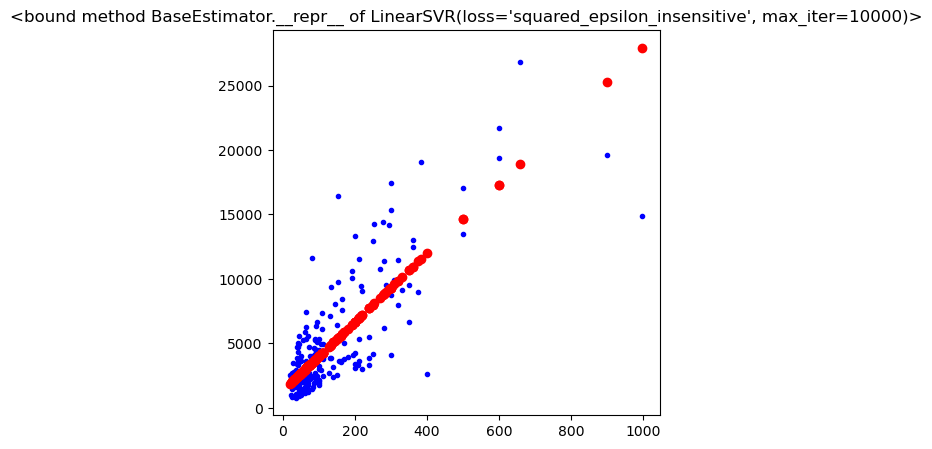

In [50]:
plot_regr(LinearSVR(C=1.0, loss='squared_epsilon_insensitive', max_iter=10000))

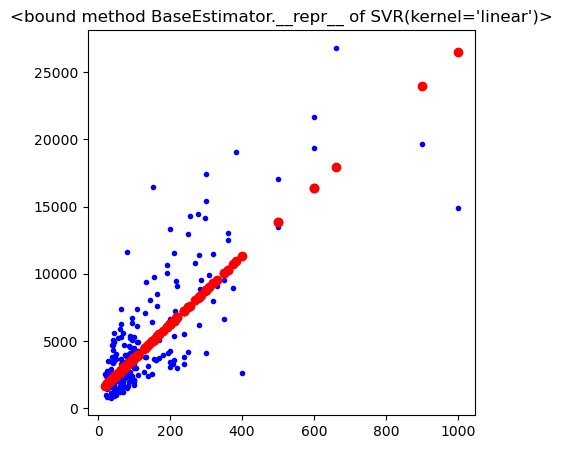

In [51]:
plot_regr(SVR(kernel='linear', C=1.0))

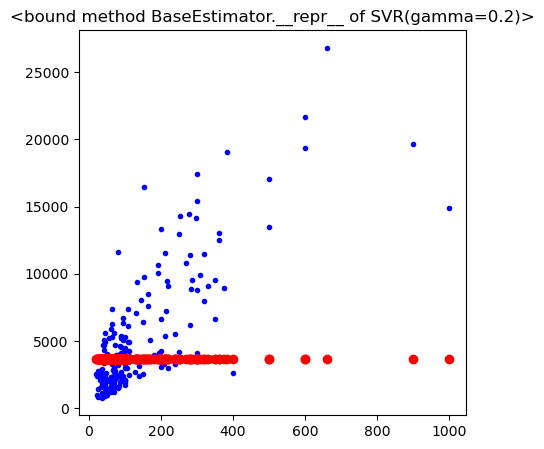

In [52]:
plot_regr(SVR(kernel='rbf', gamma=0.2, C=1.0))

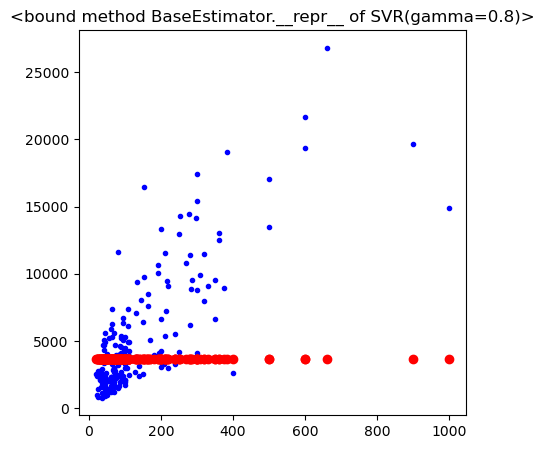

In [53]:
plot_regr(SVR(kernel='rbf', gamma=0.8, C=1.0))

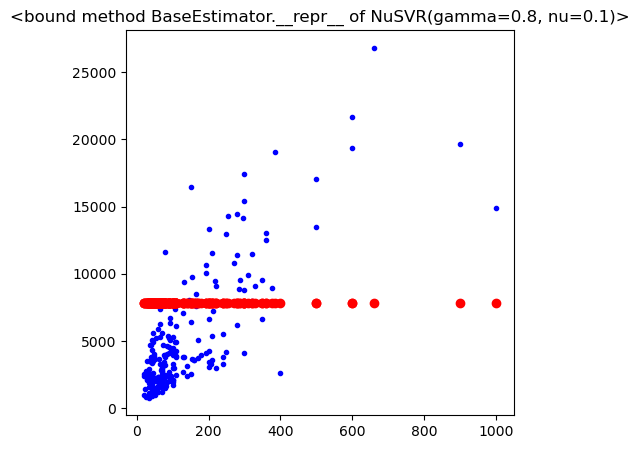

In [54]:
plot_regr(NuSVR(kernel='rbf', gamma=0.8, nu=0.1, C=1.0))

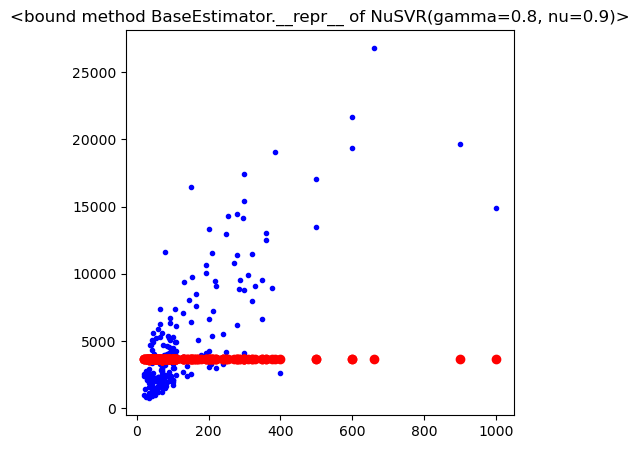

In [55]:
plot_regr(NuSVR(kernel='rbf', gamma=0.8, nu=0.9, C=1.0))

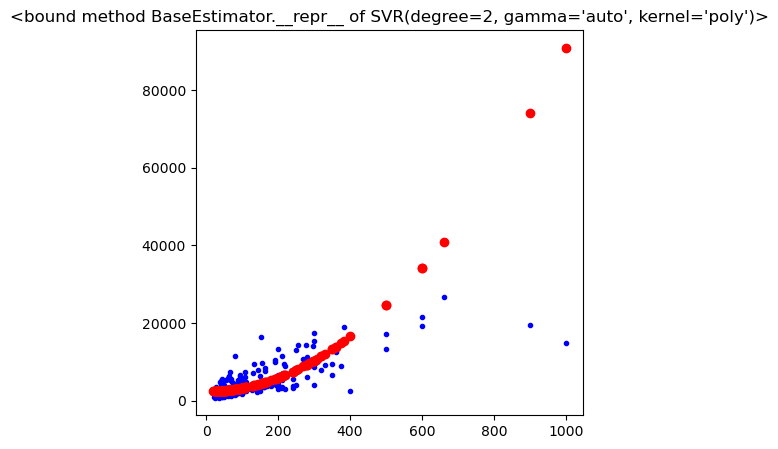

In [56]:
plot_regr(SVR(kernel='poly', degree=2, gamma='auto', C=1.0))

## Градиентный бустинг

In [57]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(rent_X, rent_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = rent_X[:, 0], rent_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=rent_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('rooms')
    ax.set_ylabel('area')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

In [67]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

In [59]:
rent_y = target.values
rooms = rent["rooms"]
area = rent["area"]
rent_X = np.array([rooms, area]).transpose()

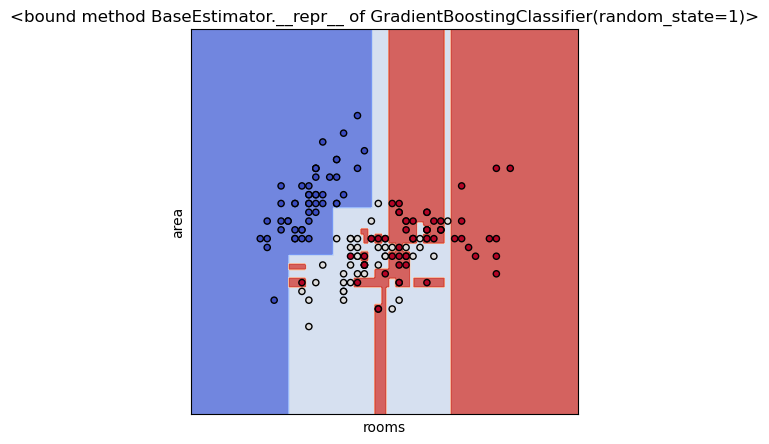

In [61]:
plot_cl(GradientBoostingClassifier(random_state=1))

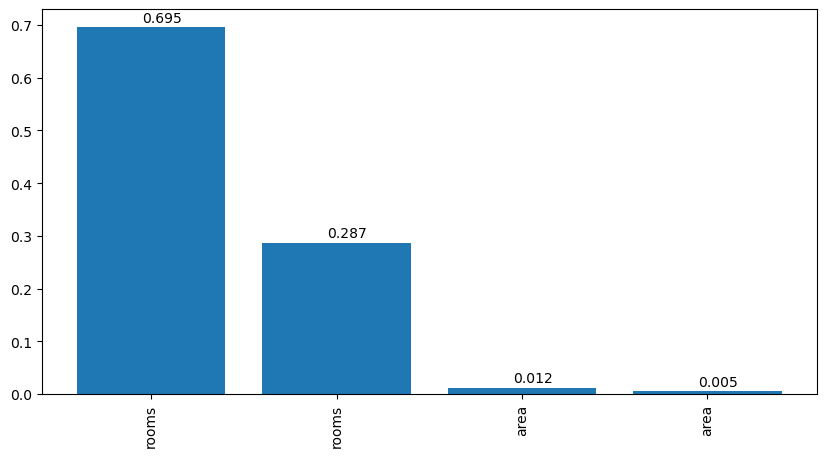

In [66]:
# Важность признаков
rent_x_ds = pd.DataFrame(data=rent['data'], columns=rent['feature_names'])
rent_gb_cl = GradientBoostingClassifier(random_state=1)
rent_gb_cl.fit(rent_x_ds, rent.target)
_,_ = draw_feature_importances(rent_gb_cl, rent_x_ds)